In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.analize.nervousness_comparator as nerv_comparator
import src.utils.analize.plotter_proof as proof
import src.utils.analize.calc as calc


# Extern
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 26)

In [2]:
data_path = get_path("data", "cp_lateness")

def get_file_path(prefix: str = "", text: str = "schedule"):
    return data_path / f"{prefix}_{text}.csv"

In [3]:
day_numb = 1

file = get_file_path(prefix="02", text=f"schedule_{day_numb:02d}_init")

df_plan_init =  pd.read_csv(file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,0,0,0,M00,49,2027,1440,29,1469,-558,0,558
1,0,0,1,M01,49,2027,1486,78,1564,-463,0,463
2,0,0,2,M02,49,2027,1628,9,1637,-390,0,390
3,0,0,3,M03,49,2027,1637,36,1673,-354,0,354
4,0,0,4,M04,49,2027,1703,49,1752,-275,0,275
...,...,...,...,...,...,...,...,...,...,...,...,...
195,19,6,5,M05,1398,3481,2483,21,2504,-977,0,977
196,19,6,6,M09,1398,3481,2504,32,2536,-945,0,945
197,19,6,7,M08,1398,3481,2683,89,2772,-709,0,709
198,19,6,8,M07,1398,3481,2772,30,2802,-679,0,679


In [4]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,0,0,9,M09,49,2027,2006,21,2027,0,0,0
19,1,1,9,M08,130,2683,2653,30,2683,0,0,0
29,2,2,9,M04,151,2994,2961,33,2994,0,0,0
39,3,3,9,M05,226,3505,3462,43,3505,0,0,0
49,4,4,9,M06,386,2353,2300,53,2353,0,0,0


In [5]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(2, last_planning_start + 1):
        file = get_file_path(prefix=schedule_prefix, text=f"schedule_{day_numb:02d}")
        df_plan_temp = pd.read_csv(file)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [6]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [7]:
append_plans_and_last_ops("04_devpen", last_planning_start = 4,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [8]:
df_plan_devpen_last_ops_list[0]

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,0,0,9,M09,49,2027,2006,21,2027,0,0,0
19,1,1,9,M08,130,2683,2653,30,2683,0,0,0
29,2,2,9,M04,151,2994,2961,33,2994,0,0,0
39,3,3,9,M05,226,3505,3462,43,3505,0,0,0
49,4,4,9,M06,386,2353,2300,53,2353,0,0,0
59,5,5,9,M07,464,2947,2922,25,2947,0,0,0
69,6,6,9,M04,480,2563,2508,55,2563,0,0,0
79,7,7,9,M03,506,3204,3125,79,3204,0,0,0
89,8,8,9,M08,526,3515,3441,74,3515,0,0,0
99,9,9,9,M07,535,3238,3193,45,3238,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [9]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [10]:
append_plans_and_last_ops("03_simple", last_planning_start = 4,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [11]:
df_plan_simple_last_ops_list[-1]

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,36,3,9,M05,2594,5873,5828,43,5871,-2,0,2
5,43,2,9,M04,3229,6072,6039,33,6072,0,0,0
6,44,9,9,M07,3235,5938,5893,45,5938,0,0,0
7,45,3,9,M05,3320,6599,6556,43,6599,0,0,0
8,46,7,9,M03,3381,6079,6000,79,6079,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,70,0,9,M09,5513,7491,7470,21,7491,0,0,0
184,71,9,9,M07,5523,8226,8181,45,8226,0,0,0
194,72,8,9,M08,5603,8592,8518,74,8592,0,0,0
204,73,2,9,M04,5637,8480,8447,33,8480,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

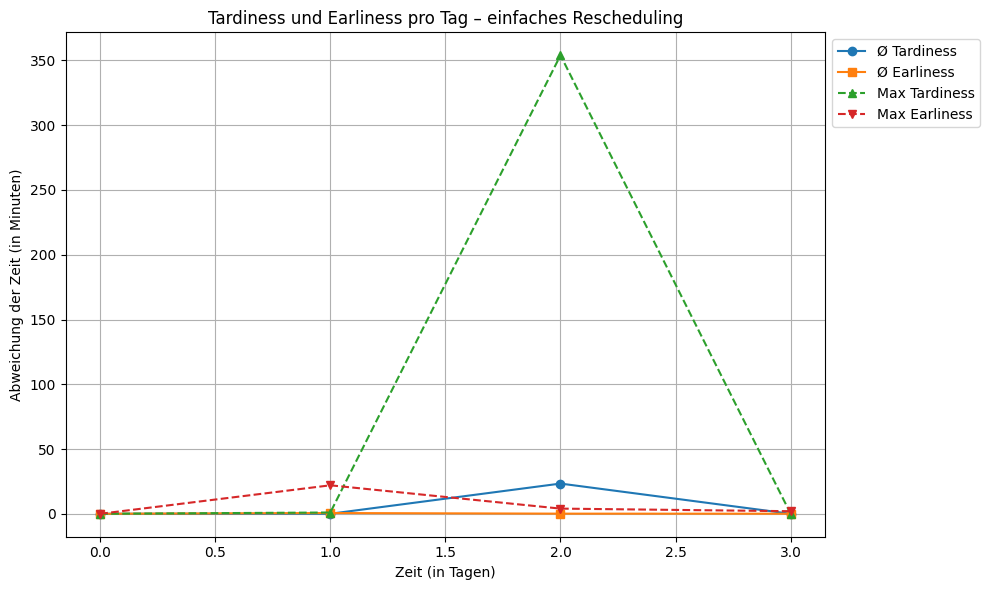

In [12]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


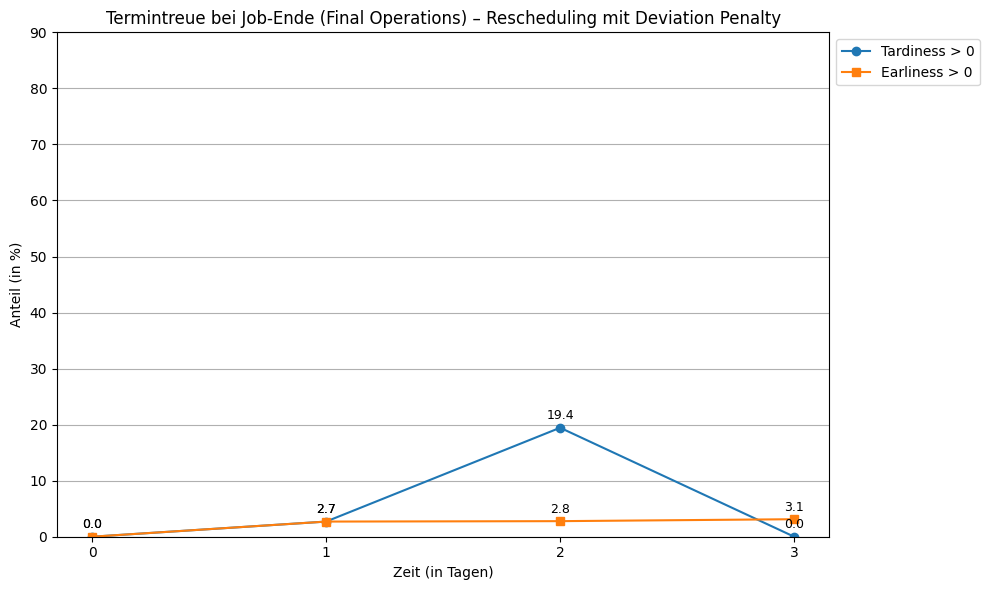

In [13]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 90
)

### b) Mit Deviation Penalty

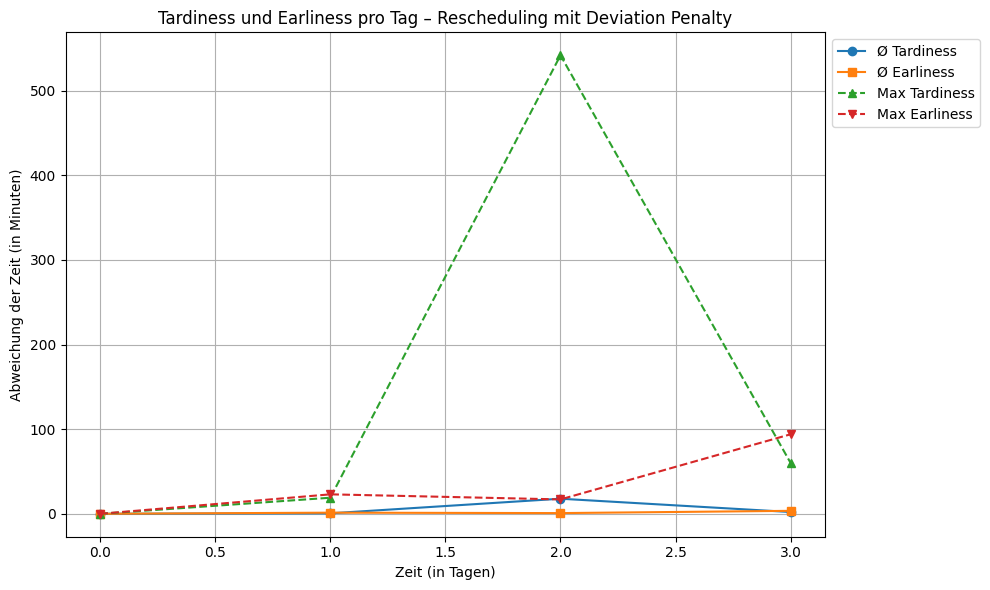

In [14]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


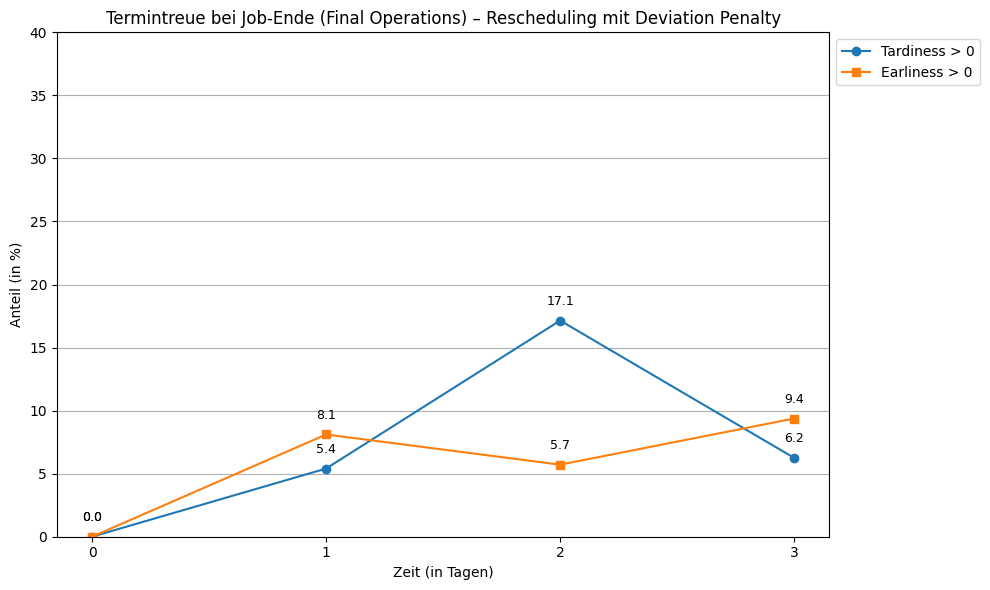

In [15]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

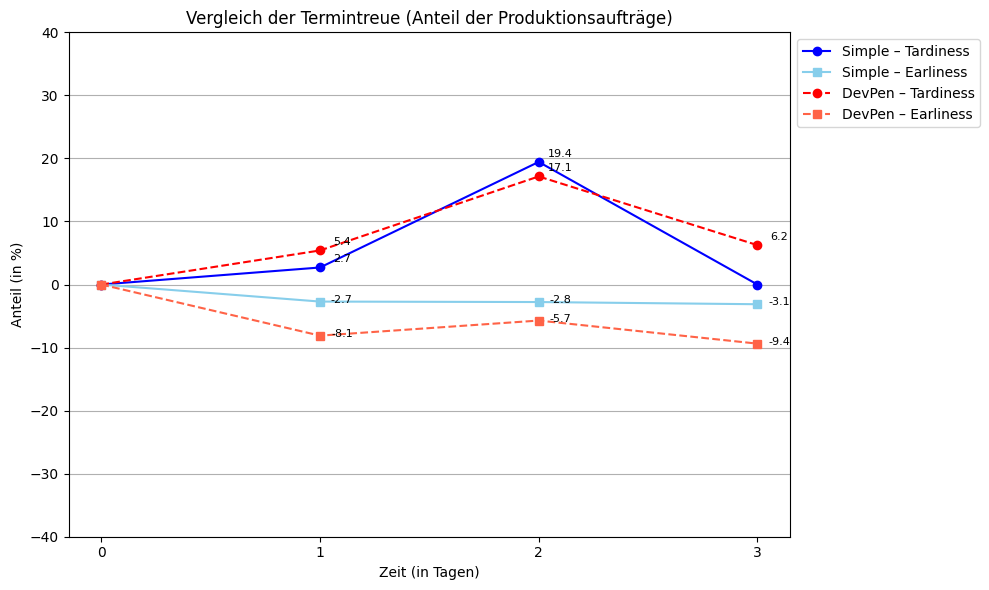

In [16]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-40,
    y_lim_max=40,
    as_percentage=True
)


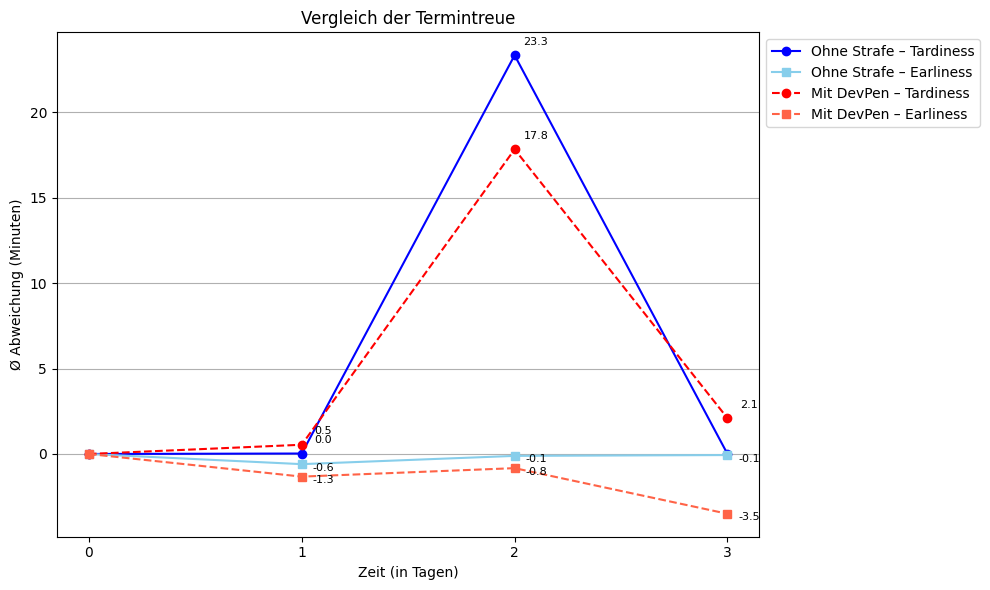

In [17]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

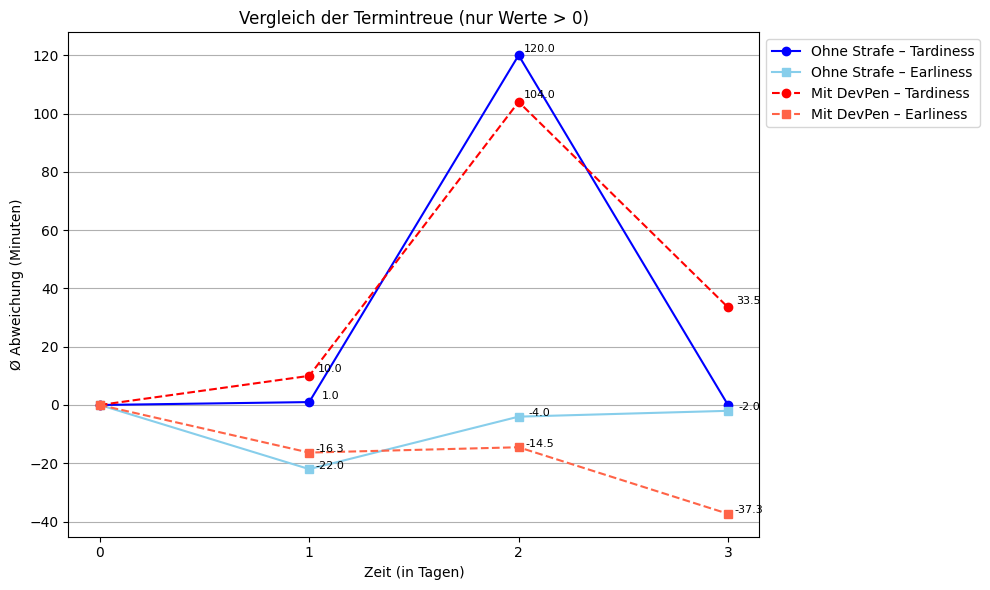

In [18]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

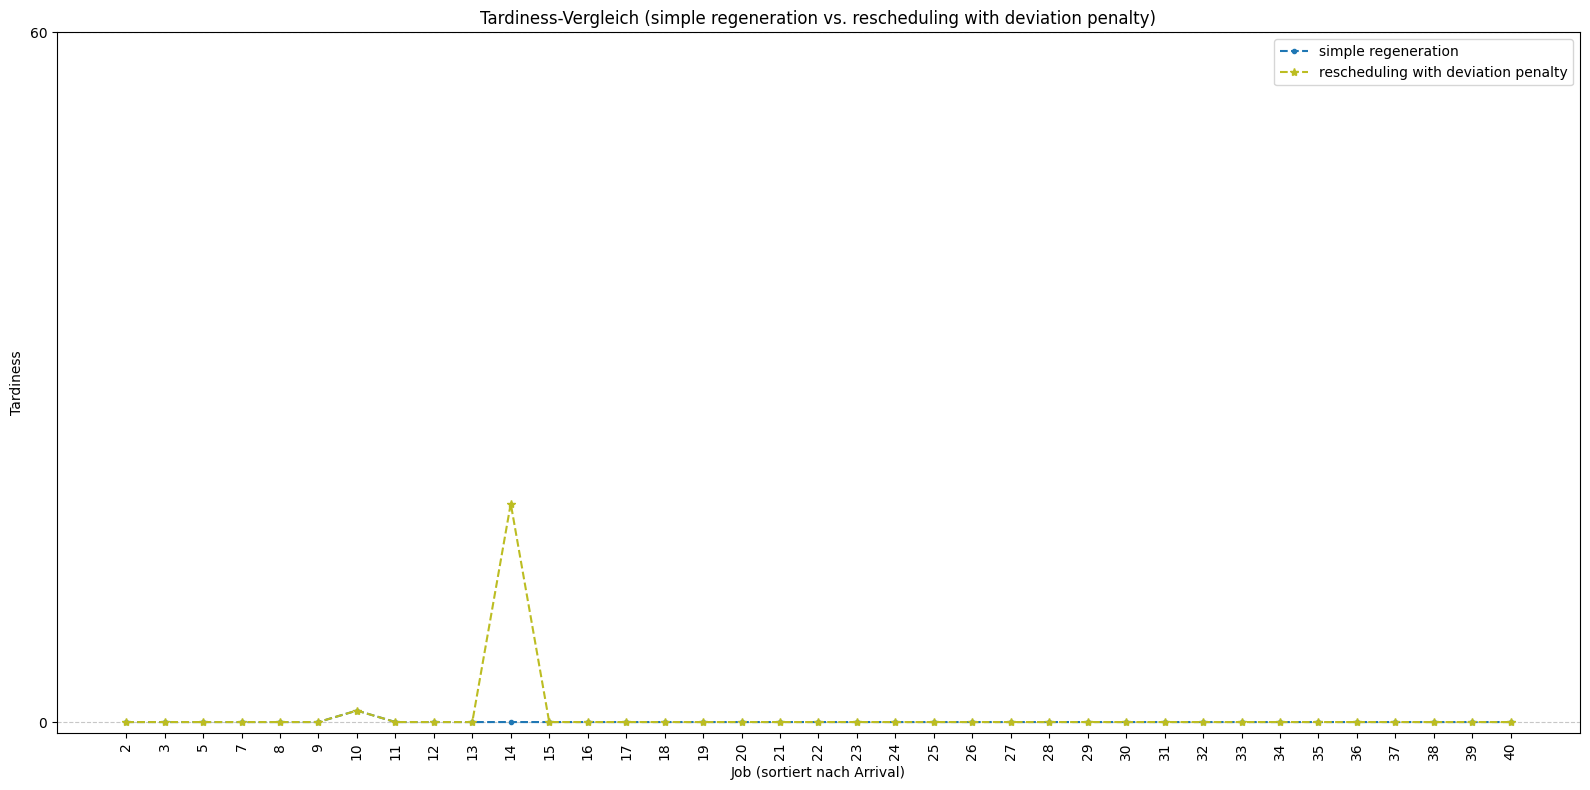

In [19]:
df_compare = proof.compare_and_plot_tardiness_single_day(
    df_plan_simple_last_ops_list[1],
    df_plan_devpen_last_ops_list[1],
    show_regression=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [20]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0, np.int64(3727), np.int64(8261), np.int64(3603)]

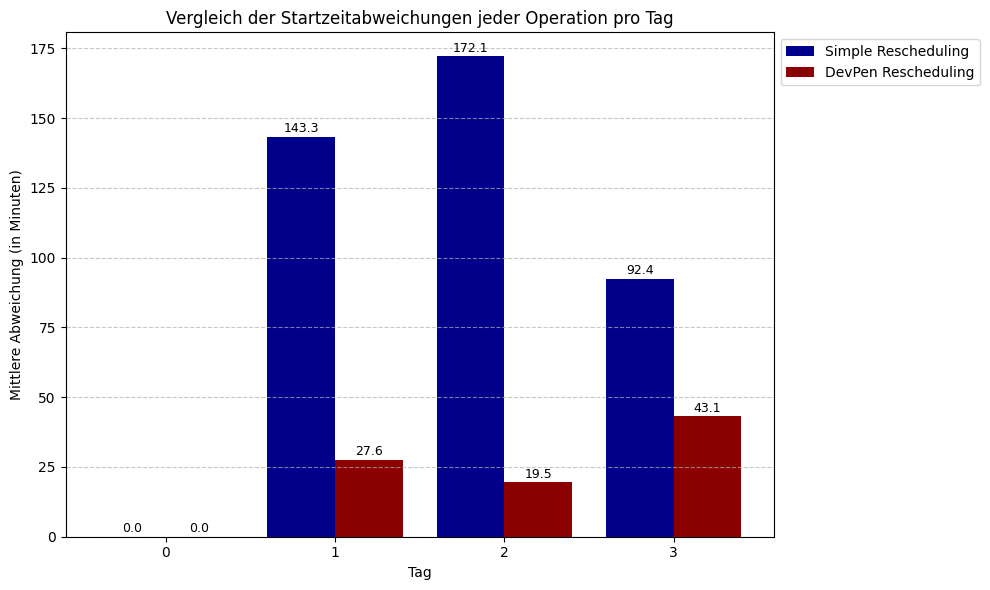

In [21]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [22]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

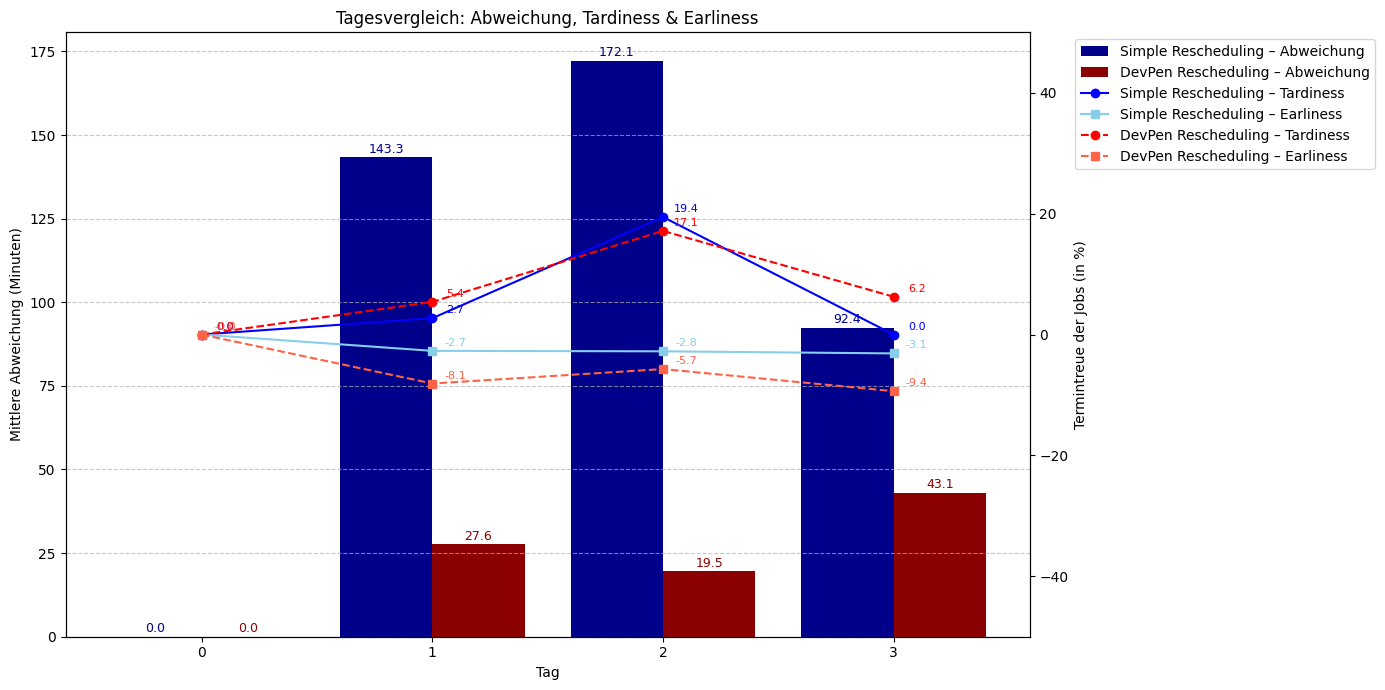

In [23]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=50
)


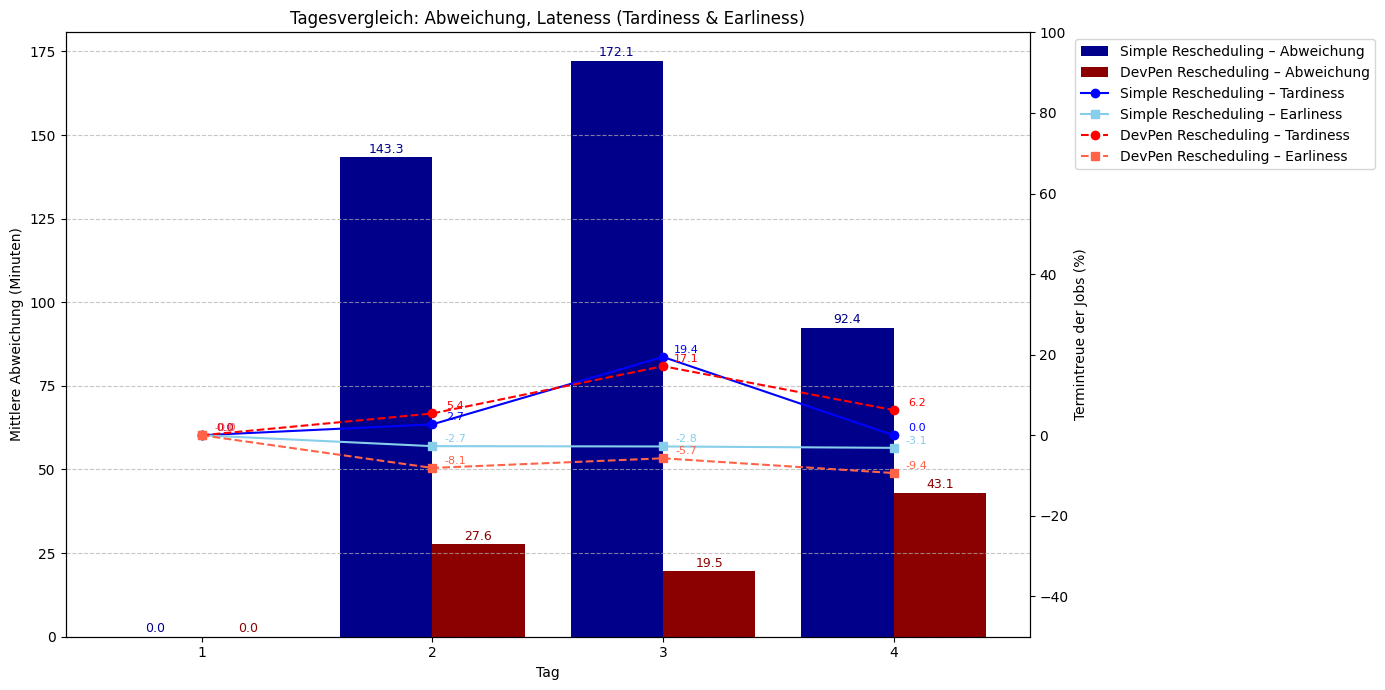

In [24]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs",
    y_right_lim_min = -50,
    y_right_lim_max = 100,
    as_percentage=True  # zeigt Tardiness/Earliness in Prozent
)


In [25]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

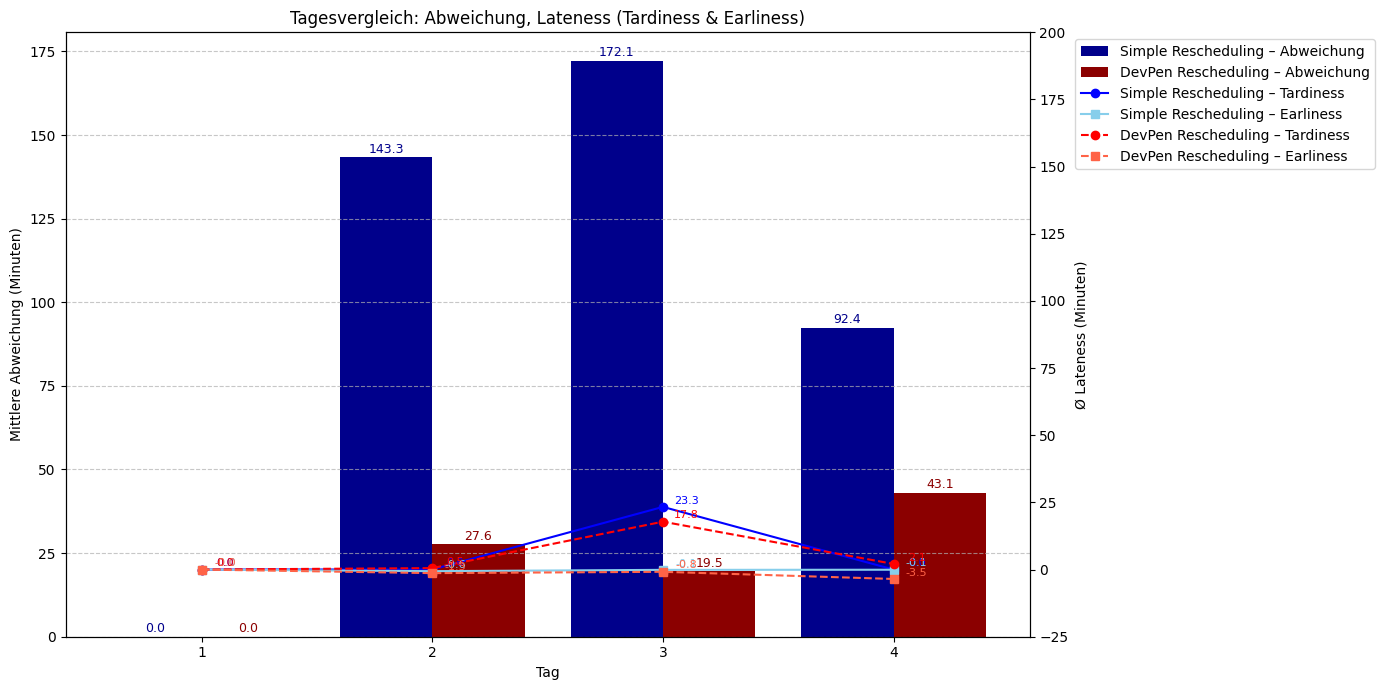

In [26]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -25,
    y_right_lim_max=200,
    as_percentage=False
)

In [27]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean", with_T1= False)
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean", with_T1= False)

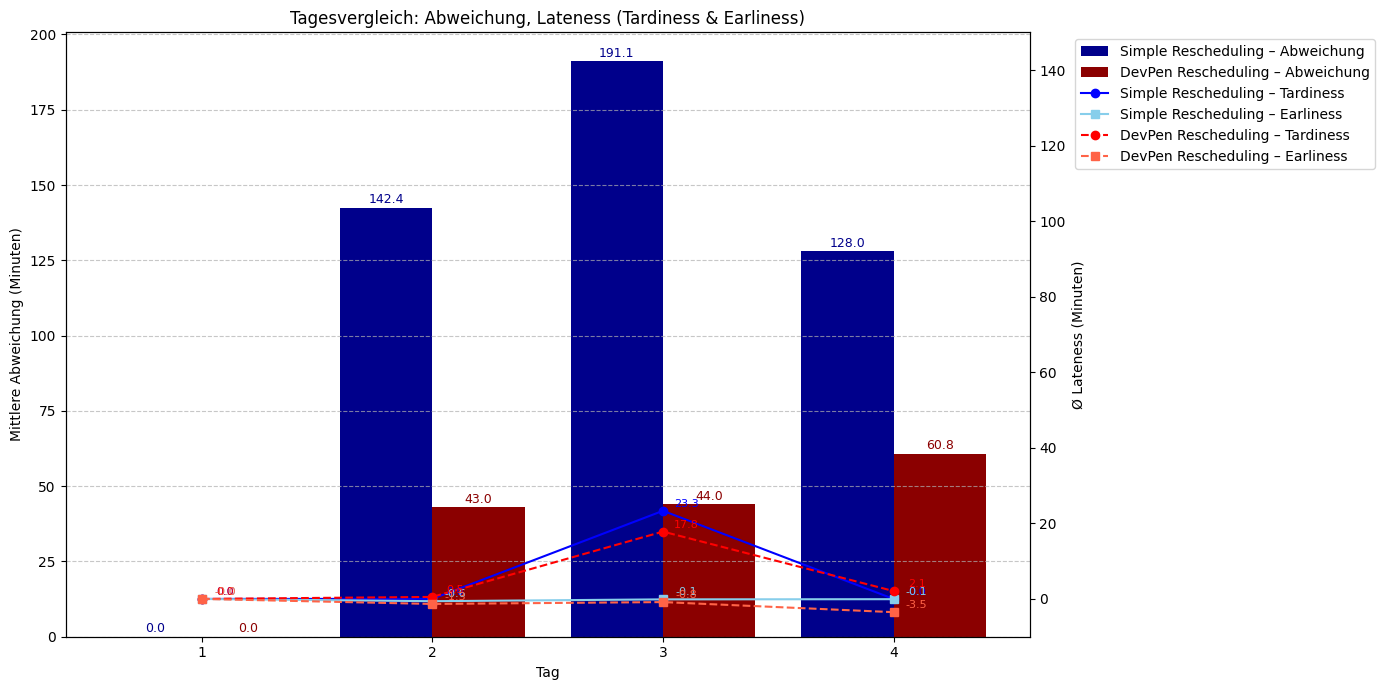

In [28]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -10,
    y_right_lim_max=150,
    as_percentage=False
)